In [3]:
import cupy as cp
import numpy as np
import time
import math
from importlib.machinery import SourceFileLoader
from scipy.special import erf
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.integrate import quad
from massshape import *

ModuleNotFoundError: No module named 'massshape'

In [2]:
config_mass_shape_output = SourceFileLoader('config_mass_shape_output', '/software/pc24403/PCBPGGSZ/outputs/toy/mass_fit/config/%s'%('config_mass_shape_output_1.py')).load_module()
varDict = config_mass_shape_output.getconfig()
Bu_M = np.linspace(5080, 5800, 20000)

In [4]:
varDict['low_sigma_k_DD'] = varDict['low_sigma_pi_DD']/varDict['low_sigma_pi_over_k_ratio']
varDict['low_sigma_k_LL'] = varDict['low_sigma_pi_LL']/varDict['low_sigma_pi_over_k_ratio']

pdf_Bu_Dstar0h_D0pi0_DK_Kspipi_LL = HORNSdini(Bu_M, varDict['low_a_Bu_Dstar0h_D0pi0_dk'], varDict['low_b_Bu_Dstar0h_D0pi0_dk'], varDict['low_csi_pi'], varDict['low_global_shift'], varDict['low_sigma_k_LL'], varDict['low_ratio_pi'], varDict['low_f_pi'])
pdf_sig_Gauss_DK_KsPiPi_DD = Gaussian(Bu_M, varDict['signal_mean'], varDict['sigma_dk_DD'])
pdf_comb_DPi_KsPiPi_LL = Exponential(Bu_M, varDict['comb_const_dpi_d2kspp_LL'])
pdf_low_misID_Bu_Dstar0h_D0pi0_DK_KsPiPi_LL = HORNSdini_misID(Bu_M, varDict['low_a_B2Dpipi_misID'], varDict['low_b_B2Dpipi_misID'], varDict['low_csi_B2Dpipi'], varDict['low_m1_B2Dpipi_misID'], varDict['low_s1_B2Dpipi_misID'], varDict['low_m2_B2Dpipi_misID'], varDict['low_s2_B2Dpipi_misID'], varDict['low_m3_B2Dpipi_misID'], varDict['low_s3_B2Dpipi_misID'], varDict['low_m4_B2Dpipi_misID'], varDict['low_s4_B2Dpipi_misID'], varDict['low_f1_B2Dpipi_misID'], varDict['low_f2_B2Dpipi_misID'], varDict['low_f3_B2Dpipi_misID'])
pdf_Bu_Dstar0h_D0gamma_DPi_KsPiPi_LL = HILLdini(Bu_M, varDict['low_a_Bu_Dstar0h_D0gamma_dpi'], varDict['low_b_Bu_Dstar0h_D0gamma_dpi'], varDict['low_csi_gamma'], varDict['low_global_shift'], varDict['low_sigma_gamma'],    varDict['low_ratio_gamma'], varDict['low_f_gamma'])
pdf_low_misID_Bu_Dstar0h_D0gamma_DK_KsPiPi_LL = HILLdini_misID(Bu_M, varDict['low_a_Bu_Dstar0h_D0gamma_dk'], varDict['low_b_Bu_Dstar0h_D0gamma_dk'], varDict['low_csi_gamma'], varDict['m1ga'], varDict['s1ga'], varDict['m2ga'], varDict['s2ga'], varDict['m3ga'], varDict['s3ga'], varDict['m4ga'], varDict['s4ga'], varDict['f1ga'], varDict['f2ga'], varDict['f3ga'])
pdf_sig_Cruijff_DK_KsPiPi_DD = CruijffExtended(Bu_M, varDict['signal_mean'], varDict['sigma_dk_DD'], varDict['sigma_dk_DD'], varDict['DD_dk_Cruijff_alpha_L'], varDict['DD_dk_Cruijff_alpha_R'], varDict['Cruijff_beta'])



/software/pc24403/tfpcbpggsz/func/massshape.py:45: RuntimeWarning: overflow encountered in exp
  firstG1 = ((2*(a_new-2*B_NEW+(m-shift))*sigma)/np.exp((a_new-(m-shift))*(a_new-(m-shift))/(2*sigma*sigma)) - (2*(b_new-2*B_NEW+(m-shift))*sigma)/np.exp((b_new-(m-shift))*(b_new-(m-shift))/(2*sigma*sigma))+ np.sqrt(2*np.pi)*((B_NEW-(m-shift))*(B_NEW-(m-shift)) + sigma*sigma)*erf((-a_new+(m-shift))/(np.sqrt(2)*sigma))  - np.sqrt(2*np.pi)*((B_NEW-(m-shift))*(B_NEW-(m-shift)) + sigma*sigma) * erf((-b_new+(m-shift))/(np.sqrt(2)*sigma)))/(2*np.sqrt(2*np.pi))
/software/pc24403/tfpcbpggsz/func/massshape.py:46: RuntimeWarning: overflow encountered in exp
  secondG1 = (((2*sigma*(a_new*a_new + B_NEW*B_NEW + a_new*(m-shift) + (m-shift)*(m-shift) - 2*B_NEW*(a_new+(m-shift)) + 2*(sigma*sigma)))/np.exp((a_new-(m-shift))*(a_new-(m-shift))/(2*(sigma*sigma))) - (2*sigma*(b_new*b_new + B_NEW*B_NEW + b_new*(m-shift) + (m-shift)*(m-shift) - 2*B_NEW*(b_new + (m-shift)) + 2*(sigma*sigma)))/np.exp((b_new - (m-shi

0.9999999999999948 2.4855552486765255e-09


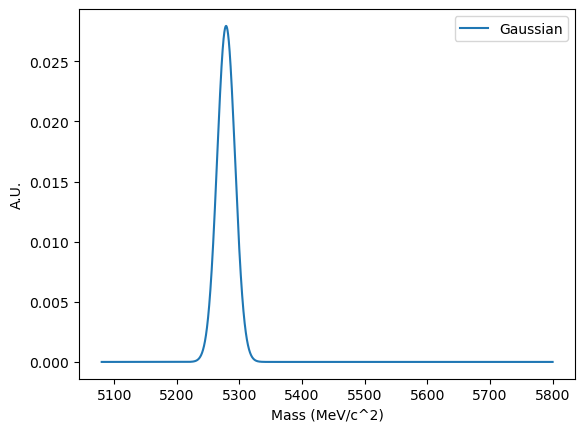

In [18]:
plt.plot(Bu_M, (pdf_sig_Gauss_DK_KsPiPi_DD), label='Gaussian')
plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('A.U.')
plt.legend()

pdf = lambda Bu_M: Gaussian(Bu_M, varDict['signal_mean'], varDict['sigma_dk_DD'])
a, b = quad(pdf, 5080, 5800)
print(a, b)

In [20]:


# Define your unnormalized PDF, e.g., a skewed distribution
#def unnormalized_pdf(Bu_M):
#    return CruijffExtended(Bu_M, varDict['signal_mean'], varDict['sigma_dk_DD'], varDict['sigma_dk_DD'], varDict['DD_dk_Cruijff_alpha_L'], varDict['DD_dk_Cruijff_alpha_R'], varDict['Cruijff_beta'])

unnormalized_pdf = lambda Bu_M: Gaussian(Bu_M, varDict['signal_mean'], varDict['sigma_dk_DD'])



# Define the normalized PDF
def normalized_pdf(Bu_M, pdf):
    # Compute the normalization constant
    normalization_constant, _ = quad(pdf, 5150, 5800)
    print(normalization_constant)
    return pdf(Bu_M) / normalization_constant

# Example usage
#pdf_values = [normalized_pdf(Bu_M, unnormalized_pdf) for Bu_M in Bu_M]
norm_pdf = normalized_pdf(Bu_M, unnormalized_pdf)



1.0000000000000009


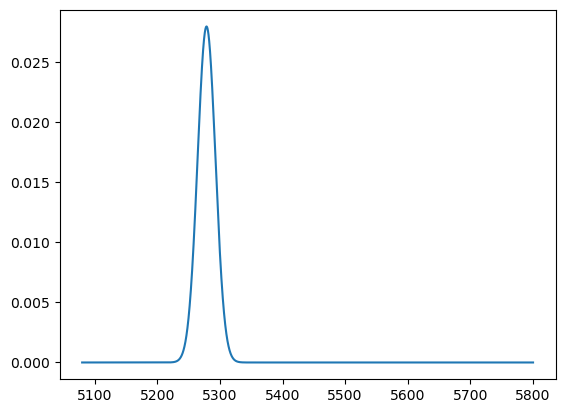

In [19]:
plt.plot(Bu_M, norm_pdf, label='Guassian')

In [8]:
import numpy as np
from scipy.integrate import quad
import scipy.stats as stats

# Define your unnormalized PDF, e.g., a skewed distribution
def unnormalized_pdf(x):
    return np.exp(-x**2) * (2 + np.sin(5 * x) + np.sin(2 * x))

# Compute the normalization constant
normalization_constant, _ = quad(unnormalized_pdf, -np.inf, np.inf)

# Define the normalized PDF
def normalized_pdf(x):
    return unnormalized_pdf(x) / normalization_constant

# Example usage
x_values = np.linspace(-3, 3, 100)
pdf_values = [normalized_pdf(x) for x in x_values]


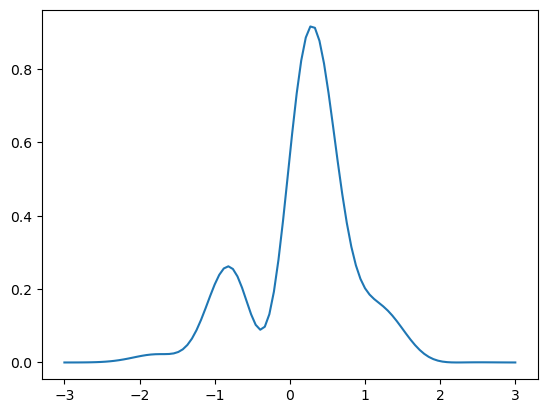

In [9]:
plt.plot(x_values, (pdf_values), label='Cruijff')

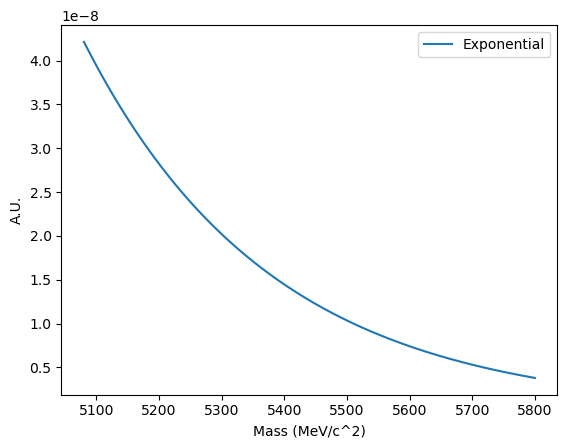

In [17]:
plt.plot(Bu_M, (pdf_comb_DPi_KsPiPi_LL), label='Exponential')
plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('A.U.')
plt.legend()


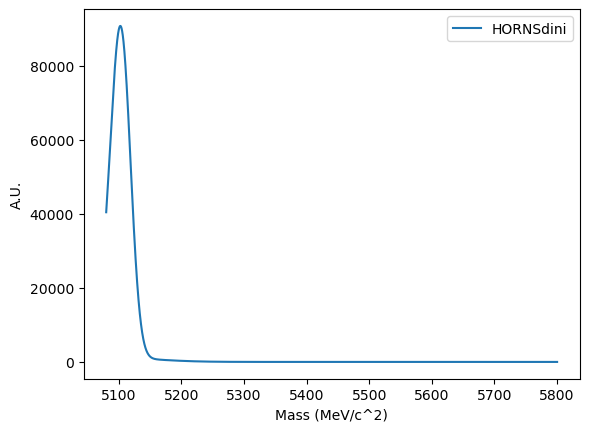

In [18]:
plt.plot(Bu_M, (pdf_Bu_Dstar0h_D0pi0_DK_Kspipi_LL), label='HORNSdini')
plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('A.U.')
plt.legend()

In [19]:
pdf_misid_CB1_DK_KsPiPi_LL = CBShape(Bu_M, varDict['LL_d2kspp_dpi_to_dk_misID_mean1'], varDict['LL_d2kspp_dpi_to_dk_misID_width1'], varDict['LL_d2kspp_dpi_to_dk_misID_alpha1'], varDict['LL_d2kspp_dpi_to_dk_misID_n1'])

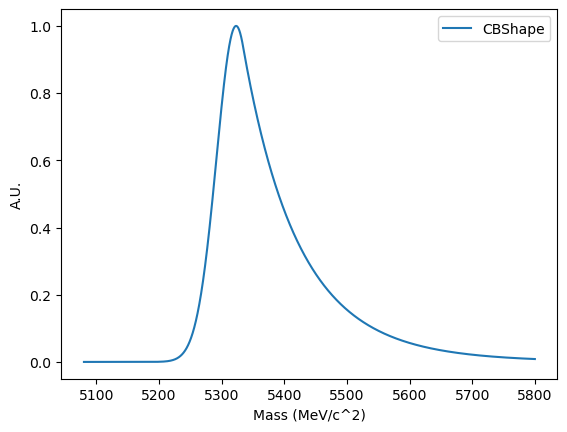

In [21]:
#plot 

plt.plot(Bu_M, (pdf_misid_CB1_DK_KsPiPi_LL), label='CBShape')
plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('A.U.')
plt.legend()
plt.show()

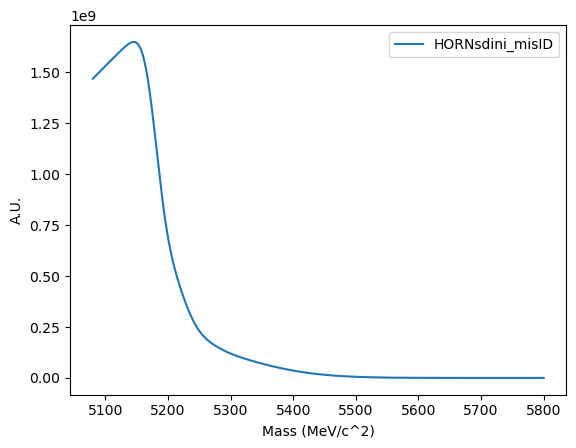

In [22]:
plt.plot(Bu_M, (pdf_low_misID_Bu_Dstar0h_D0pi0_DK_KsPiPi_LL), label='HORNsdini_misID')
plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('A.U.')
plt.legend()
plt.show()

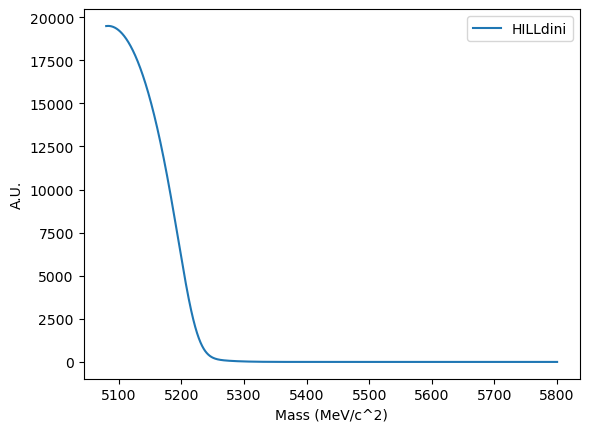

In [23]:
plt.plot(Bu_M, (pdf_Bu_Dstar0h_D0gamma_DPi_KsPiPi_LL), label='HILLdini')
plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('A.U.')
plt.legend()
plt.show()

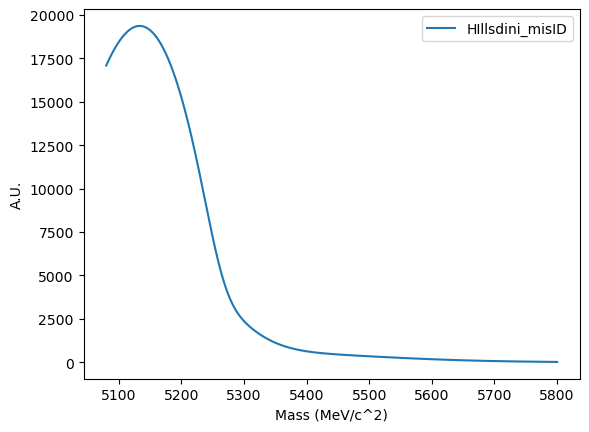

In [24]:
plt.plot(Bu_M, (pdf_low_misID_Bu_Dstar0h_D0gamma_DK_KsPiPi_LL), label='HIllsdini_misID')
plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('A.U.')
plt.legend()
plt.show()

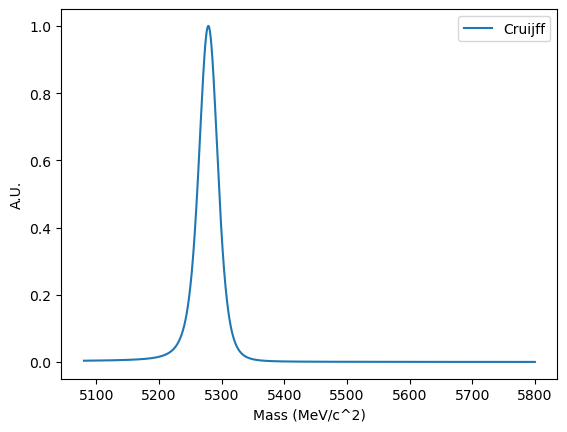

In [25]:
plt.plot(Bu_M, (pdf_sig_Cruijff_DK_KsPiPi_DD), label='Cruijff')
plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('A.U.')
plt.legend()

In [21]:
import numpy as np
from scipy.integrate import quad
import scipy.stats as stats
Bu_M = np.linspace(5080, 5800, 200000)
# Define your unnormalized PDF, e.g., a skewed distribution
#def unnormalized_pdf(Bu_M):
#    return CruijffExtended(Bu_M, varDict['signal_mean'], varDict['sigma_dk_DD'], varDict['sigma_dk_DD'], varDict['DD_dk_Cruijff_alpha_L'], varDict['DD_dk_Cruijff_alpha_R'], varDict['Cruijff_beta'])

unnormalized_pdf = lambda Bu_M: Exponential(Bu_M, varDict['comb_const_dpi_d2kspp_LL'])



# Define the normalized PDF
def normalized_pdf(Bu_M, pdf):
    # Compute the normalization constant
    normalization_constant, _ = quad(pdf, 5150, 5800)
    print(normalization_constant)

    return pdf(Bu_M) / normalization_constant

# Example usage
#pdf_values = [normalized_pdf(Bu_M, unnormalized_pdf) for Bu_M in Bu_M]
norm_pdf = normalized_pdf(Bu_M, unnormalized_pdf)



42.212997818948374


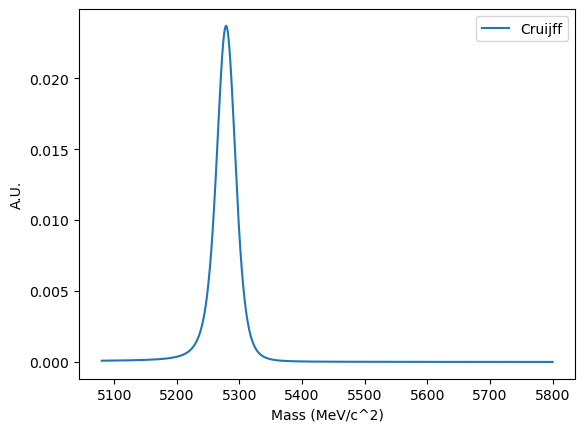

In [22]:
plt.plot(Bu_M, (norm_pdf), label='Cruijff')
plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('A.U.')
plt.legend()

# Illustration of addPdf (correctly norm)

In [ ]:
def addPdf(pdflist=[], frac=[]):
    if isinstance(pdflist, np.ndarray):
        pdflist = [pdflist]  # Wrap single numpy array in a list
    pdflist = [cp.array(pdf, dtype=float) for pdf in pdflist]  # Ensure all elements are numpy arrays

    if not isinstance(frac, list):
        frac = [frac]  # Convert single fraction to list

    # Initialize the PDF with zeros of the same shape as the first PDF in the list
    pdf = np.zeros_like(pdflist[0], dtype=float)

    # Normalize PDFs in pdflist if their sum is not exactly 1
    for i in range(len(pdflist)):
        if np.sum(pdflist[i]) != 1:
            pdflist[i] = norm_pdf(pdflist[i])


    if len(pdflist) != len(frac):
        if len(frac) ==1:
            pdf = frac[0]*pdflist[0] + (1-frac[0])*pdflist[1]

            return pdf
        else:
            return None and print('The length of the list of pdfs and the list of fractions must be the same')
    
    else:
        for i in range(len(pdflist)):
                pdf += frac[i]*pdflist[i]
        return pdf

In [ ]:

new_pdf = addPdf([pdf_sig_Cruijff_DK_KsPiPi_DD, pdf_sig_Gauss_DK_KsPiPi_DD], varDict['LL_dk_Cruijff_frac'])

In [ ]:
plt.plot(Bu_M, new_pdf, label='Cruijff + Gaussian')
plt.plot(Bu_M, norm_pdf(pdf_sig_Gauss_DK_KsPiPi_DD)*(1-varDict['LL_dk_Cruijff_frac']), label='Gaussian')
plt.plot(Bu_M, norm_pdf(pdf_sig_Cruijff_DK_KsPiPi_DD)*(varDict['LL_dk_Cruijff_frac']), label='Cruijff')

plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('A.U.')

plt.legend()

In [ ]:
#Add yields
n_tot = len(Bu_M)
plt.plot(Bu_M, new_pdf*n_tot, label='Cruijff + Gaussian')
plt.plot(Bu_M, norm_pdf(pdf_sig_Gauss_DK_KsPiPi_DD)*(1-varDict['LL_dk_Cruijff_frac'])*n_tot, label='Gaussian')
plt.plot(Bu_M, norm_pdf(pdf_sig_Cruijff_DK_KsPiPi_DD)*(varDict['LL_dk_Cruijff_frac'])*n_tot, label='Cruijff')

plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('A.U.')

plt.legend()